# Content:

 1. [Analysing the iris flower dataset with `sklearn`](#iris)
 2. [Quick analysis with Pandas](#pandas)
 3. [Box plot](#boxplot)
 4. [Pearson correlation coefficient](#pearson)
 5. [Principal component analysis](#pca)
 6. [Your first machine learning model with PCA](#mlpca)
 7. [Singular value decomposition and its connection to PCA](#svd)
 8. [Quantifying the model accuracy with `explained_variance`](#explained_variance)

# 1. <a name="iris">Analysing the iris flower dataset with `sklearn`</a>

The iris flower dataset collected by [Ronald Fischer in 1936](https://en.wikipedia.org/wiki/Iris_flower_data_set) contain measurements of sepal and petal dimensions of three different species of the flower.  
<img src="iris.png"  height="150">

The dataset contains 150 measurements of 4 features:
- sepal length
- sepal width
- petal length
- petal width

along with a label for each species (as 0,1,2 instead of names). This dataset is one of the most widely used for exploratory data analysis and for illustrating concepts related to supervised and unsupervised machine learning.

In [1]:
from sklearn import datasets

In [2]:
iris=datasets.load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
# uncomment the following line and run the cell and analyse the output
# print(iris) 

In [5]:
# uncomment the following lines and run the cell and analyse the output
#print(iris.data)

In [6]:
# uncomment the following lines and run the cell and analyse the output
#print(iris.data.T)

In [7]:
print(iris.data.shape) # returns 150 (for rows) and 4 (for columns)

(150, 4)


In [8]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
# uncomment the following line and run the cell and analyse the output
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
print(iris.target.shape)

(150,)


In [11]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


# 2. <a name="pandas">Quick analysis with Pandas</a>

In [12]:
import pandas as pd

In [13]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
from pandas.plotting import scatter_matrix, boxplot

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

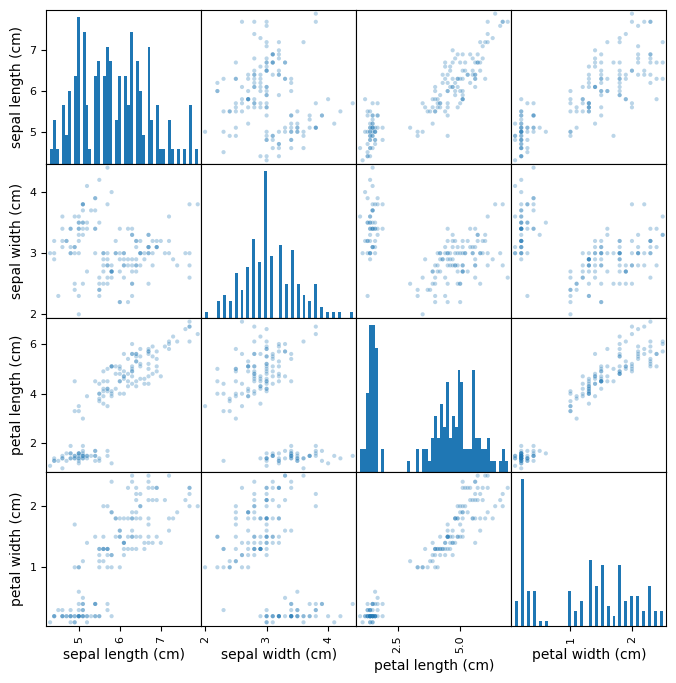

In [15]:
scatter_matrix(iris_df,alpha=0.3,figsize=(8,8),hist_kwds={'bins':50})

Note that in each of the scatterplots we have all three different types of flowers. We can color code them for clarity.

In [16]:
colors=list()
palette={0:'red',1:'green',2:'blue'} # Recall, print(iris.target_names) = ['setosa' 'versicolor' 'virginica']

N_data=iris.data.shape[0]

for i_data in range(N_data):
    i_color=int(iris.target[i_data])
    colors.append(palette[i_color])

In [17]:
# uncomment the following line and run the cell and analyse the output
#colors

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

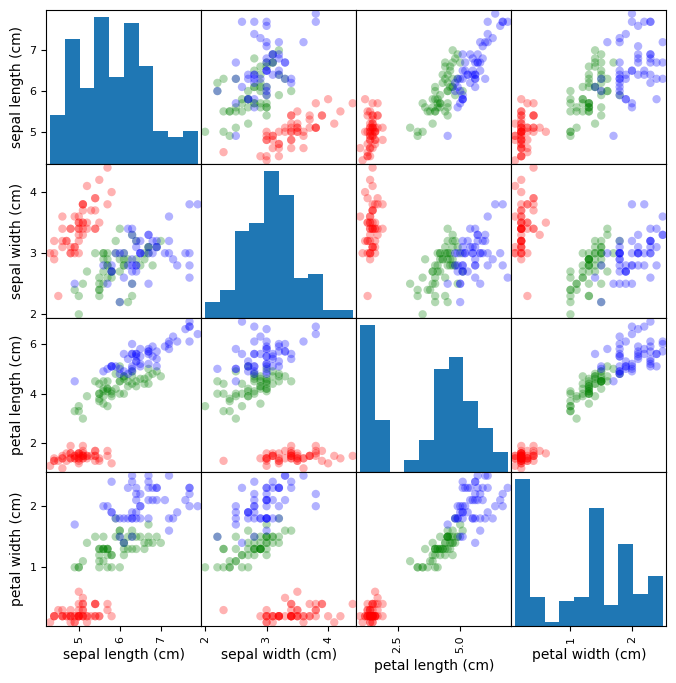

In [18]:
scatter_matrix(iris_df,alpha=0.3,figsize=(8,8),color=colors,marker='o')

# 3. <a name="boxplot">Box plot</a>

A box and whisker plot or diagram (otherwise known as a boxplot), is a graph summarising a set of data. The shape of the boxplot shows how the data is distributed and it also shows any outliers. It is a useful way to compare different sets of data as you can draw more than one boxplot per graph. These can be displayed alongside a number line, horizontally or vertically.

See [https://en.wikipedia.org/wiki/Box_plot](https://en.wikipedia.org/wiki/Box_plot)

<img src="Boxplot_vs_PDF.png">

##### _An extreme value is considered to be an outlier if it is 1.5 interquartile ranges below the first quartile, or 1.5 interquartile ranges above the third quartile. Interquartile range is the height of the box. These data points may be eliminated if we think that these values are not reasonable and there maybe possible measurement errors._

<AxesSubplot:>

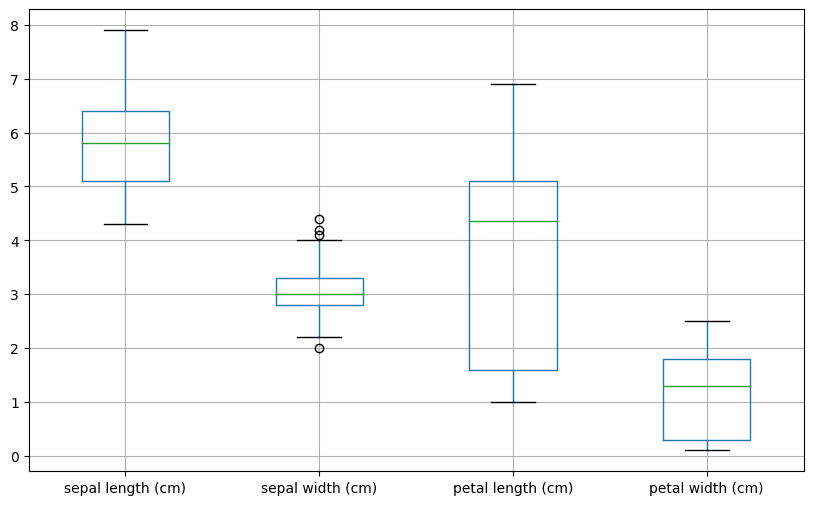

In [19]:
boxplot(iris_df,figsize=(10,6))

Here is the histogram of `sepal width` to get another perspective on the outliers

(array([ 1.,  0.,  3.,  4.,  0.,  3.,  8.,  5.,  9., 14.,  0., 10., 26.,
        11.,  0., 13.,  6., 12.,  6.,  4.,  0.,  3.,  6.,  2.,  0.,  1.,
         1.,  1.,  0.,  1.]),
 array([2.  , 2.08, 2.16, 2.24, 2.32, 2.4 , 2.48, 2.56, 2.64, 2.72, 2.8 ,
        2.88, 2.96, 3.04, 3.12, 3.2 , 3.28, 3.36, 3.44, 3.52, 3.6 , 3.68,
        3.76, 3.84, 3.92, 4.  , 4.08, 4.16, 4.24, 4.32, 4.4 ]),
 <BarContainer object of 30 artists>)

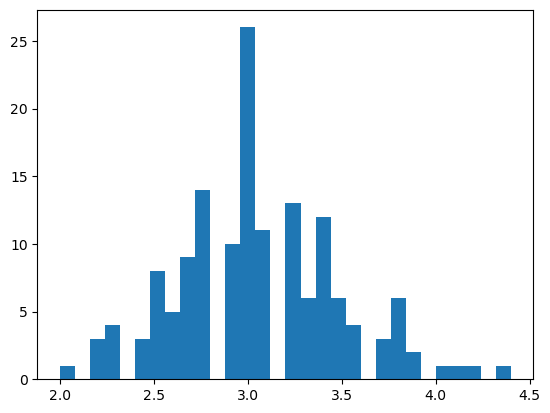

In [20]:
import matplotlib.pyplot as plt

plt.hist(iris_df['sepal width (cm)'],bins=30)

# 4. <a name="pearson">Pearson correlation coefficient</a>

The Pearson correlation coefficient $ r $ between two variables $ X $ and $ Y $ is calculated using the following formula:

$ r = \frac{{\sum{{(X_i - \bar{X})(Y_i - \bar{Y})}}}}{{\sqrt{{\sum{{(X_i - \bar{X})^2}} \sum{{(Y_i - \bar{Y})^2}}}}}} $

Where:
- $ X_i $ and $ Y_i $ are individual data points for variables $ X $ and $ Y $, respectively.
- $ \bar{X} $ and $ \bar{Y} $ are the means of variables $ X $ and $ Y $, respectively.
- The summations are taken over all data points in the dataset.

This formula measures the linear relationship between two variables, and the resulting correlation coefficient $ r $ ranges from -1 to 1, where:
- $ r = 1 $ indicates a perfect positive correlation,
- $ r = -1 $ indicates a perfect negative correlation, and
- $ r = 0 $ indicates no linear correlation between the variables.


Using `numpy` one can calculate paiwise correlation coefficients between multiple rows.

In [21]:
import numpy as np
iris_corrcoef=np.corrcoef(iris.data.T) # Note data.T is used to convert columns to rows
iris_corrcoef

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

Here is a visual representation of the correlation matrix

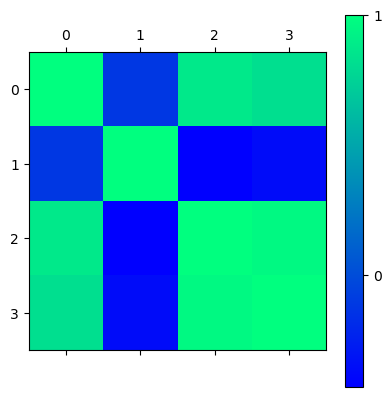

In [22]:
corr_plot=plt.matshow(iris_corrcoef,cmap=plt.cm.winter)
# you can change the color map using options given here 
# https://matplotlib.org/stable/gallery/color/colormap_reference.html
plt.colorbar(corr_plot,ticks=[-1,0,+1])

The diagonal elements correspond to 1.0, so they are green. We also show that some off-diagonal elements are close to 1.0 (mostly green) implying that some features of the flower are correlated. 

Suppose, no two features are correlated, then it means that in order to describe the dataset, we need all features and there is no redundant information in feature about another feature. In a way, this means that all features are _orthogonal to one another_.

Using `pandas` one can calculate all pairwise correlation coeffients between all the columns in a dataframe.

In [23]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


# 4. <a name="pca">Principal component analysis</a>

Since in the Iris dataset we that out of 4 features some are coupled, we can form some linear combinations of the features and select a smaller number (i.e. less than 2) of these _new features_ to describe all the information present in the dataset. Such _composite features_ can be obtained using the principal component analysis (PCA).

In [24]:
from sklearn.decomposition import PCA

In [25]:
#iris.data

In [26]:
#iris.data.T

#### Let's see if we can find one composite feature, that is sufficient to classify all three species of Iris. Exactly how the classification works will be discussed later.

In [27]:
pca_1c=PCA(n_components=1) # model selection
x_pca_1c=pca_1c.fit_transform(iris.data)
print(x_pca_1c.shape)

(150, 1)


In [28]:
x_pca_1c

array([[-2.68412563],
       [-2.71414169],
       [-2.88899057],
       [-2.74534286],
       [-2.72871654],
       [-2.28085963],
       [-2.82053775],
       [-2.62614497],
       [-2.88638273],
       [-2.6727558 ],
       [-2.50694709],
       [-2.61275523],
       [-2.78610927],
       [-3.22380374],
       [-2.64475039],
       [-2.38603903],
       [-2.62352788],
       [-2.64829671],
       [-2.19982032],
       [-2.5879864 ],
       [-2.31025622],
       [-2.54370523],
       [-3.21593942],
       [-2.30273318],
       [-2.35575405],
       [-2.50666891],
       [-2.46882007],
       [-2.56231991],
       [-2.63953472],
       [-2.63198939],
       [-2.58739848],
       [-2.4099325 ],
       [-2.64886233],
       [-2.59873675],
       [-2.63692688],
       [-2.86624165],
       [-2.62523805],
       [-2.80068412],
       [-2.98050204],
       [-2.59000631],
       [-2.77010243],
       [-2.84936871],
       [-2.99740655],
       [-2.40561449],
       [-2.20948924],
       [-2

You can print exactly how the linear combination is made, and check if the vector is normalized

In [29]:
pca_1c.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ]])

In [30]:
pca_1c.components_**2

array([[0.13060027, 0.00714406, 0.73388453, 0.12837115]])

In [31]:
np.linalg.norm(pca_1c.components_[0])

1.0

OK, now we have to test is this single principal component has any useful information at all. 

In [32]:
pca_1c.explained_variance_ratio_.sum() # to be explained later, right now take it as a performance score

0.9246187232017271

The quantity printed above is the percentage of variance that is attributed to the composite feature. This means that just with one component, it is possible to classify the labels of the dataset. Let's see how this might work.

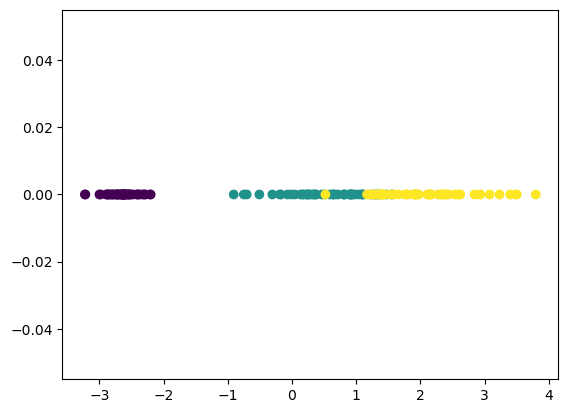

In [33]:
plt.scatter(x_pca_1c,np.zeros(150),c=iris.target)

#### Can we improve the `variance score` using more than one principal component?

In [34]:
pca_2c=PCA(n_components=2)
x_pca_2c=pca_2c.fit_transform(iris.data)
print(x_pca_2c.shape)

(150, 2)


In [35]:
pca_2c.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [36]:
pca_2c.components_**2

array([[0.13060027, 0.00714406, 0.73388453, 0.12837115],
       [0.43110881, 0.53313572, 0.03005808, 0.00569738]])

In [37]:
pca_2c.explained_variance_ratio_.sum()

0.977685206318795

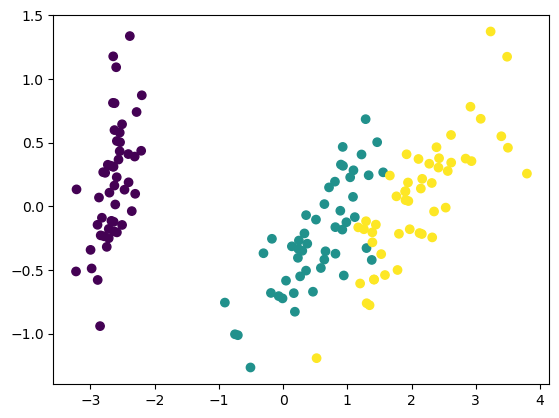

In [38]:
plt.scatter(x_pca_2c[:,0],x_pca_2c[:,1],c=iris.target)

With this 2D scatterplot, we can get some idea about what classification of labels actually means. We can draw lines as in a map to divide regions where we can locate all data point corresponding to same label. 

In general, one would like to keep as few principal components as possible until the prediction score given by `explained_variance_ratio_.sum()` is improved sufficiently, say for example reaches 0.95 or so.

In [39]:
for n in range(1,5):
    pca_nc=PCA(n_components=n)
    x_pca_nc=pca_nc.fit_transform(iris.data)
    score=pca_nc.explained_variance_ratio_.sum()
    print("By retaining ", n, "components in PCA, we get a score of", score)

By retaining  1 components in PCA, we get a score of 0.9246187232017271
By retaining  2 components in PCA, we get a score of 0.977685206318795
By retaining  3 components in PCA, we get a score of 0.9947878161267247
By retaining  4 components in PCA, we get a score of 1.0


# 6. <a name="mlpca">Your first machine learning model with PCA</a>

Let us call the features as ${\bf X}$ and the label (or target) as ${\bf y}$.

In [40]:
X = iris.data     # matrix
y = iris.target   # vector

Let us divide the dataset into two sets: a training set and a test set. We can use 80% of the data for training and the remaining 20% we can use for testing. This paritioning is called as 80/20 split. 

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

It is important that the feature vectors, i.e., columns of ${\bf X}$ have same magnitudes. Hence, let's normalize these vectors.

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Let's use the two principal components obtained using the training data and see if we can use the same vectors to predict the labels in the test set. So, the first step is to find the linear combinations using the training data and apply the same coefficients to the features in the test set.

In [43]:
pca_2c_model = PCA(n_components=2)
X_train = pca_2c_model.fit_transform(X_train)  # Training phase in PCA
X_test = pca_2c_model.transform(X_test)        # Test phase / prediction phase in PCA

#### _Note that we are not using `y_train` for making the PCA model. This kind of machine learning where you make a model exclusively based on the features without the knowledge of the labels is called unsupervised machine learning._

Let's plot the PCA features for each training data point and see that a classification is possible.

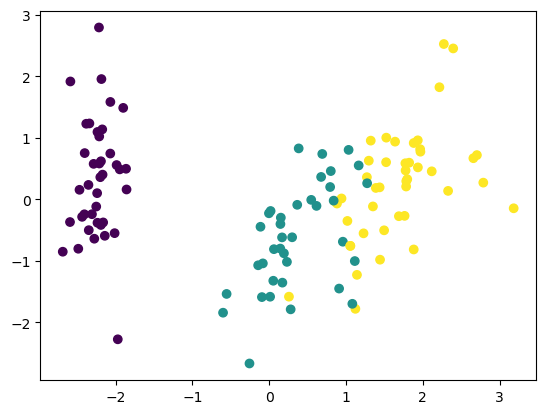

In [44]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

We can now see that the features can be plotted also for the test set and the vectors---trained over 80% of the data--are able to classify the remaining 20% of the data not used for making the PCA model.

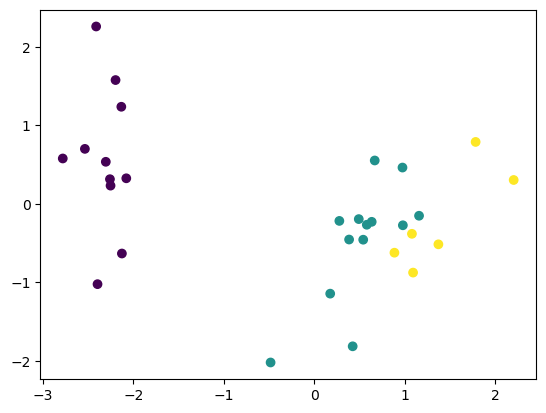

In [45]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

# 7. <a name="svd">Singular value decomposition and its connection to PCA</a>

### Singular Value Decomposition (SVD)
[SVD](https://en.wikipedia.org/wiki/Singular_value_decomposition) is a matrix factorization technique used in various applications such as dimensionality reduction, image compression, and data analysis. Given a matrix \( A \), SVD decomposes it into three matrices:

1. **U**: Left singular vectors matrix
2. **Σ**: Diagonal matrix of singular values
3. **V**: Right singular vectors matrix

Mathematically, it can be represented as:

$ A = U \Sigma V^T $

Where:
- $ U $ is an orthogonal matrix containing the left singular vectors.
- $ \Sigma $ is a diagonal matrix containing the singular values.
- $ V $ is an orthogonal matrix containing the right singular vectors.

SVD can be used for dimensionality reduction by retaining only the top $ k $ singular values and their corresponding singular vectors.

### PCA Using SVD 

The right singular vectors (which correspond to the columns of matrix V in SVD) are the principal components. PCA can be seen as a method for dimensionality reduction that utilizes the singular value decomposition (SVD) to find the principal components of the data. Therefore, SVD is often used as a computational tool to perform PCA, especially when dealing with large datasets, as SVD is generally more numerically stable and efficient than directly computing the covariance matrix and its eigenvectors.

### Recall PCA 

For a given set of features, PCA performs orthogonal transformation to obtain a linear combination of features also known as principal components. For the iris dataset, the features are sepal length, sepal width, petal length and petal width. 

The first principal component is one such _axis_ along which the variance is maximum. What we mean by the last line is that the first principal component contains the maximum amount of information contained in all the features under consideration. The second principal component contains the next maximum amount of information, and so on. Usually the hope in a classification problem is that, one can extract the information contained in $N$ features using $M$ principal components, where $N>>M$.

Let's quickly recall the PCA exercise for iris.

In [46]:
from sklearn import datasets
from sklearn.decomposition import PCA

iris=datasets.load_iris()

X = iris.data     # matrix 150x4
y = iris.target   # vector 150x1

pca_2c_model=PCA(n_components=2)
x_pca_2c=pca_2c_model.fit_transform(iris.data)

pca_2c_model.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

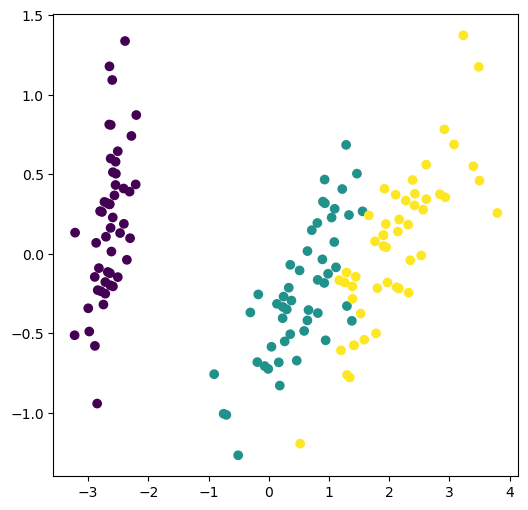

In [47]:
fig, ax = plt.subplots(figsize=(6,6))  # the subplot technique is used so that we can make the scatterplot square
ax.scatter(x_pca_2c[:,0],x_pca_2c[:,1],c=y)

Let's have a quick look at the mathematical technique behind PCA. It's called singular value decomposition, shortly SVD. We are already somewhat familiar with the SVD concept. It is very similar to matrix diagonalization, except that our matrix need not be square and it can be rectangular.

In [48]:
iris=datasets.load_iris()

X = iris.data     # matrix 150x4
y = iris.target   # vector 150x1

# Centralize features (each column of X) by shifting w.r.t the mean (of that column)
Xc = X-np.mean(X,axis=0)

In [49]:
U,s,Vt=np.linalg.svd(Xc)

In [50]:
print("The sigular values are\n",s) # The should agree with pca_2c_model.singular_values_

The sigular values are
 [25.09996044  6.01314738  3.41368064  1.88452351]


In [51]:
print("Principal component vectors are\n",Vt) # same as pca_2c_model.components_ printed above

Principal component vectors are
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]
 [ 0.58202985 -0.59791083 -0.07623608 -0.54583143]
 [ 0.31548719 -0.3197231  -0.47983899  0.75365743]]


In [52]:
c1=Vt[0,:]  
print("First principal component is\n",c1)

First principal component is
 [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]


In [53]:
c2=Vt[1,:]
print("Second principal component is\n",c2)

Second principal component is
 [-0.65658877 -0.73016143  0.17337266  0.07548102]


In [54]:
Nc=2 # No. of components

W2=Vt[:Nc,:]    

X2D=np.dot(Xc,W2.T)   # Shape of Xc is 150x4,   Shape of W2=Vt[:Nc,:] is Ncx4,    Shape of W2.T is 4xNc
                      # Shape of X2D is 150xNc

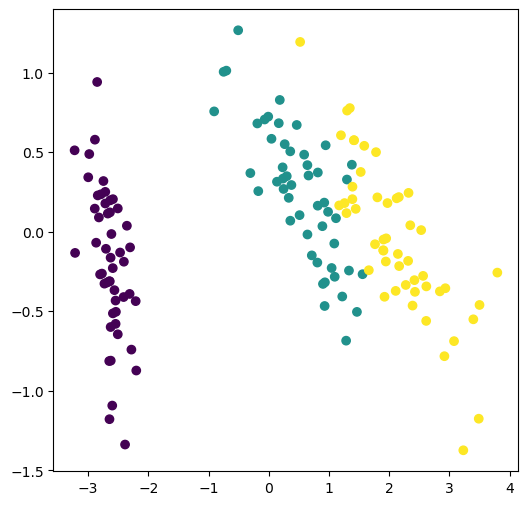

In [55]:
fig, ax = plt.subplots(figsize=(6,6))  
ax.scatter(X2D[:,0],X2D[:,1],c=y)

The scatterplot looks a little different than the earlier one because the phase of the second principal component has changed in our SVD. But, these phases are not important for application of SVD in PCA.

# 8. <a name="explained_variance">Quantifying the model accuracy with `explained_variance`</a>

In PCA, we quantify the model's accuracy using the error metric `explained_variance`. What this quantity contains is the information about the eigenvalues of the covariance matrix.

Let's get this score for the PCA model built with `sklearn`

In [56]:
print('Explained variance is \n',pca_2c_model.explained_variance_)

Explained variance is 
 [4.22824171 0.24267075]


Now, let us calculate this vector using the covariance for the principal components that we calculated with SVD. 

The covariance matrix is computed as:

$ \text{Cov} = \frac{1}{n-1}(X - \bar{X})^T (X - \bar{X}) $

Where:
- $ X $ is the $ n \times p $ matrix representing the dataset with each row as an observation and each column as a variable.
- $ \bar{X} $ is the mean vector of the dataset, computed separately for each variable.
- $ (X - \bar{X})^T $ denotes the transpose of the centered data matrix.
- $ \frac{1}{n-1} $ is the scaling factor to ensure an unbiased estimate of the covariance.


In [57]:
a=X2D.T[0]
b=X2D.T[1]

In [58]:
n=len(a)
mu_a=np.mean(a)
mu_b=np.mean(b)
a=a-mu_a
b=b-mu_b

In [59]:
np.dot(a.T,a)/(n-1)

4.228241706034861

In [60]:
np.dot(a.T,b)/(n-1)

-1.324816468311093e-15

In [61]:
np.dot(b.T,b)/(n-1)

0.2426707479286337

In [62]:
var=np.cov(X2D.T)   #   .T is for transpose
print(var)

[[ 4.22824171e+00 -1.30395322e-15]
 [-1.30395322e-15  2.42670748e-01]]


The covariance matrix is already diagonal as it is supposed to be. 

In [63]:
var=var.diagonal()
print(var)

[4.22824171 0.24267075]


To calculate the ratio of the variances, we need the total variance contained in the original set of features. 

In [64]:
all_var=np.cov(X.T)  # for all features, you calculate the covariance matrix
all_var=all_var.diagonal()
print(all_var)

[0.68569351 0.18997942 3.11627785 0.58100626]


In [65]:
norm_var=var/np.sum(all_var)
print(norm_var)

[0.92461872 0.05306648]


This is the vector we calculated before to quantify the performance of PCA.

In [66]:
print('Explained variance ratio is \n', pca_2c_model.explained_variance_ratio_)

Explained variance ratio is 
 [0.92461872 0.05306648]


These values mean that 92.5% of the information is contained in the first principal component, 5.3% in the second component. The rest, 2.2% is contained in the third and fourth components. 

Finally, remember, PCA is one of the most popular techniques for dimensionality reduction.